In [1]:
import seaborn as sns
import numpy as np
import scipy as sp
import umap

from preprocess import *

In [2]:
download()
alldat = load()

Loading data. Patience, padawan ...


In [23]:
alldat[0].keys()

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])

In [24]:
alldat[0]['spks'].shape # (neuron, trial, timpoint)

(734, 214, 250)

In [25]:
alldat[0]['response_time'].shape

(214, 1)

In [ ]:
def proc_data(data, session):
    session_data = data[session]
    arr_list = []
    for ind in range(data['response_time'].shape[0]):
        arr_list.append(data['spks'][])

In [3]:
dat = spike_preprocess(alldat)

session 0
session 1
session 2
session 3
session 4
session 5
session 6
session 7
session 8
session 9
session 10
session 11
session 12
session 13
session 14
session 15
session 16
session 17
session 18
session 19
session 20
session 21
session 22
session 23
session 24
session 25
session 26
session 27
session 28
session 29
session 30
session 31
session 32
session 33
session 34
session 35
session 36
session 37
session 38
joining dataframes (may take up to a minute)...
done


In [4]:
pickle_data(dat, fname='processed_spikes.pickle')

Processed Data Dumped


dat structure:
- 0-250 : time bins
- 'session' - 'code' : behavior / region

In [5]:
print(dat.columns.to_numpy())

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 'session' 'trial' 'region' 'response_time'
 'go_cue' 'feedback_time' 'feedback_type' 'contrast_le

In [6]:
dat.shape

(8787226, 263)

In [7]:
from sklearn.decomposition import PCA 

In [12]:
session = 0
trial = 0
sess = dat[dat['session'] == session]

In [17]:
sess.shape

(157076, 263)

In [34]:
trial

,0,1,2,3,4,5,6,7,8,9,...,response_time,go_cue,feedback_time,feedback_type,contrast_left,contrast_right,mouse_name,neuron_num,area,code
0,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,0,other_ctx,0_0
1,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,1,other_ctx,0_1
2,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,2,other_ctx,0_2
3,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,3,basal_ganglia,0_3
4,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,4,other_ctx,0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1,0,1,1,0,0,0,0,0,1,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,729,hipp,0_729
730,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,730,hipp,0_730
731,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,731,hipp,0_731
732,0,0,0,0,0,0,0,0,0,0,...,1.150204,1.027216,1.186819,1.0,1.0,0.0,Cori,732,vis_ctx,0_732


In [10]:
sess['trial' == 0]

0         0
1         0
2         0
3         0
4         0
         ..
157071    0
157072    0
157073    0
157074    0
157075    0
Name: 0, Length: 157076, dtype: int8

In [15]:
pv = trial.pivot(columns=['session' 'trial' 'region' 'response_time'
 'go_cue' 'feedback_time' 'feedback_type' 'contrast_left' 'contrast_right'
 'mouse_name' 'neuron_num' 'area' 'code'],   index = '')

In [28]:
pv = trial.groupby(['neuron_num']).mean()

In [29]:
pv

,0,1,2,3,4,5,6,7,8,9,...,248,249,session,trial,response_time,go_cue,feedback_time,feedback_type,contrast_left,contrast_right
neuron_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.150204,1.027216,1.186819,1.0,1.0,0.0


In [ ]:
sess_re = sess.pivot(index='foo', columns='bar', values='baz')

In [58]:
np.unique(sess['neuron_num'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [51]:
sess[sess['neuron_num'] == 0].shape

(214, 263)

In [46]:
sess.iloc[:, :250]

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157071,0,0,0,0,0,1,2,0,0,0,...,2,0,0,0,0,0,0,0,0,1
157072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
np.unique(sess1['area'])

array(['basal_ganglia', 'hipp', 'other', 'other_ctx', 'vis_ctx'],
      dtype=object)

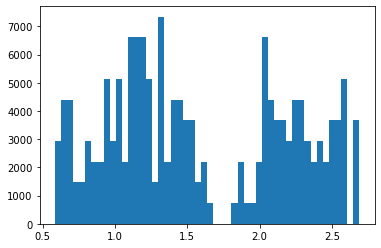

## Trial Conditions

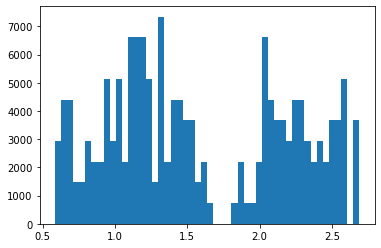

In [23]:
plt.hist(sess1['response_time'], 50);

In [74]:
# fuck it
n_neurons = alldat[session]['spks'].shape[0]
X = alldat[session]['spks'].reshape((n_neurons, -1)).T

In [101]:
alldat[session]['spks'].shape

(734, 214, 250)

In [62]:
model = PCA(n_components = 100).fit(X)

In [63]:
X_red = model.transform(X)

In [64]:
model.__dict__

{'n_components': 100,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 '_fit_svd_solver': 'randomized',
 'mean_': array([9.34579439e-04, 6.54205607e-03, 1.53831776e-02, 2.24299065e-04,
        7.66355140e-04, 4.29906542e-04, 1.05981308e-02, 1.88224299e-02,
        8.97196262e-04, 1.23364486e-03, 4.48598131e-04, 5.10280374e-03,
        1.79626168e-02, 6.68785047e-02, 7.55140187e-03, 2.43738318e-02,
        3.10280374e-03, 6.45233645e-02, 7.47663551e-04, 1.59252336e-02,
        1.86915888e-05, 5.42056075e-04, 1.10841121e-02, 3.37009346e-02,
        1.45794393e-03, 1.23925234e-02, 5.60747664e-05, 2.07850467e-02,
        2.80747664e-02, 1.02803738e-03, 4.71028037e-03, 8.85981308e-03,
        6.44859813e-03, 4.39252336e-03, 1.17757009e-03, 1.15514019e-02,
        5.79439252e-04, 2.46168224e-02, 2.39065421e-02, 3.96261682e-03,
        3.73831776e-03, 6.52336449e-03, 1.45794393e-02, 2.80373832e-03,
        4.73831776e-02, 

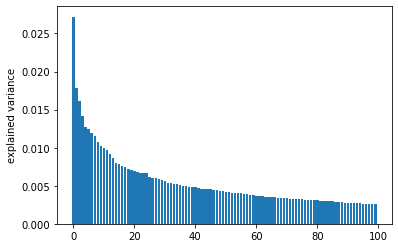

In [65]:
plt.bar(np.arange(len(model.explained_variance_ratio_)), model.explained_variance_ratio_)
plt.ylabel("explained variance");

In [66]:
import umap

In [67]:
reducer = umap.UMAP(random_state=42)
reducer.fit(X_red)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [121]:
n_trial = alldat[session]['active_trials'].shape

In [68]:
embedding = reducer.transform(X_red)

In [69]:
embedding.shape

(53500, 2)

In [70]:
time = np.arange(embedding.shape[0])

In [119]:
n_trial

NameError: name 'n_trial' is not defined

In [ ]:
active = embedding[:214*250].reshape( ,n_trial, 250).mean(axis)
passive = embedding[214*250:].reshape().mean(axis)

In [118]:
embedding.shape

(53500, 2)

In [125]:
alldat[session]['response'] > 0

array([ True, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,

In [112]:
np.where(alldat[session]['active_trials'] == False)

(array([214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
        266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
        279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
        292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
        305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
        318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
        331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
        344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
        357, 358, 359, 360, 361, 362, 363], dtype=int64),)

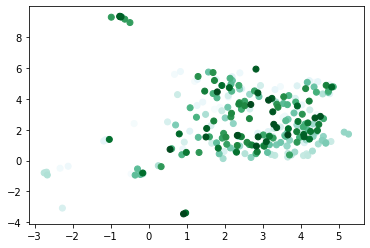

In [102]:
for t in np.arange(0, 10, 10):
    trial = t
    l,r = trial*250, (trial+1)*250
    plt.scatter(embedding[l:r,0], embedding[l:r,1], c=time[l:r], cmap='BuGn')